Naive Bayes Classifier using sklearn which includes preprocessing on the titanic dataset

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.impute import SimpleImputer

#load dataset
df = pd.read_csv('titanic.csv')
df = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']]




In [2]:
#preprocessing
print(df)


     Survived  Pclass   Age  SibSp  Parch     Fare Embarked
0           0       3  22.0      1      0   7.2500        S
1           1       1  38.0      1      0  71.2833        C
2           1       3  26.0      0      0   7.9250        S
3           1       1  35.0      1      0  53.1000        S
4           0       3  35.0      0      0   8.0500        S
..        ...     ...   ...    ...    ...      ...      ...
886         0       2  27.0      0      0  13.0000        S
887         1       1  19.0      0      0  30.0000        S
888         0       3   NaN      1      2  23.4500        S
889         1       1  26.0      0      0  30.0000        C
890         0       3  32.0      0      0   7.7500        Q

[891 rows x 7 columns]


In [30]:
df.describe()

,Survived,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000
mean,0.383838,0.000000,0.523008,0.381594,3.987333e-18,1.536476
std,0.486592,1.000562,1.102743,0.806057,1.000562e+00,0.791503
min,0.000000,-2.224156,0.000000,0.000000,-6.484217e-01,0.000000
25%,0.000000,-0.565736,0.000000,0.000000,-4.891482e-01,1.000000
50%,0.000000,-0.104637,0.000000,0.000000,-3.573909e-01,2.000000
75%,1.000000,0.433312,1.000000,0.000000,-2.424635e-02,2.000000
max,1.000000,3.891554,8.000000,6.000000,9.667167e+00,2.000000


In [3]:
print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare Embarked
0         0       3  22.0      1      0   7.2500        S
1         1       1  38.0      1      0  71.2833        C
2         1       3  26.0      0      0   7.9250        S
3         1       1  35.0      1      0  53.1000        S
4         0       3  35.0      0      0   8.0500        S


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB
None


In [6]:
print(df.dtypes)

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [8]:
print(df.shape)

(891, 7)


In [11]:
#handle missing values
imputer = SimpleImputer(strategy = 'median')
df[['Age','Fare']] = imputer.fit_transform(df[['Age','Fare']])


In [12]:
#fill Embarked values with most frequest values
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)

In [13]:
#encode embarked coloumn
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [21]:
#normalize using Standard Scaler or MinMax Scaler
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])


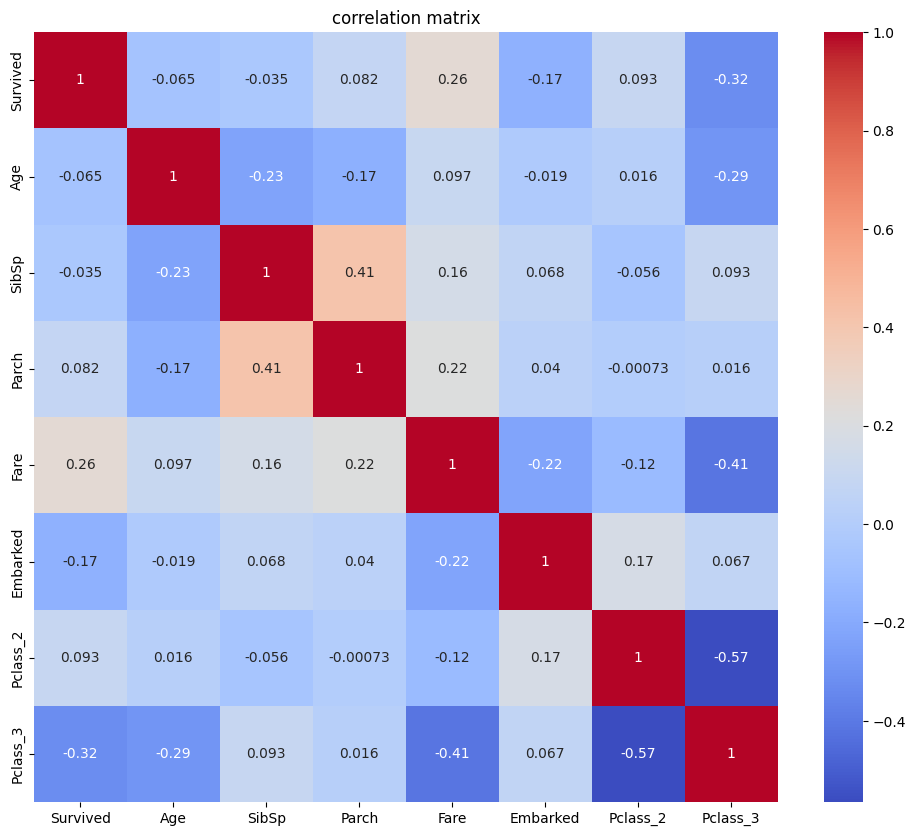

In [22]:
#plot the correlation Matrix
plt.figure(figsize = (12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot = True,cmap = "coolwarm")
plt.title("correlation matrix")
plt.show()

In [23]:
X = df.drop('Survived',axis = 1)
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)




In [26]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(cm)
print(accuracy)

[[78 27]
 [35 39]]
0.6536312849162011


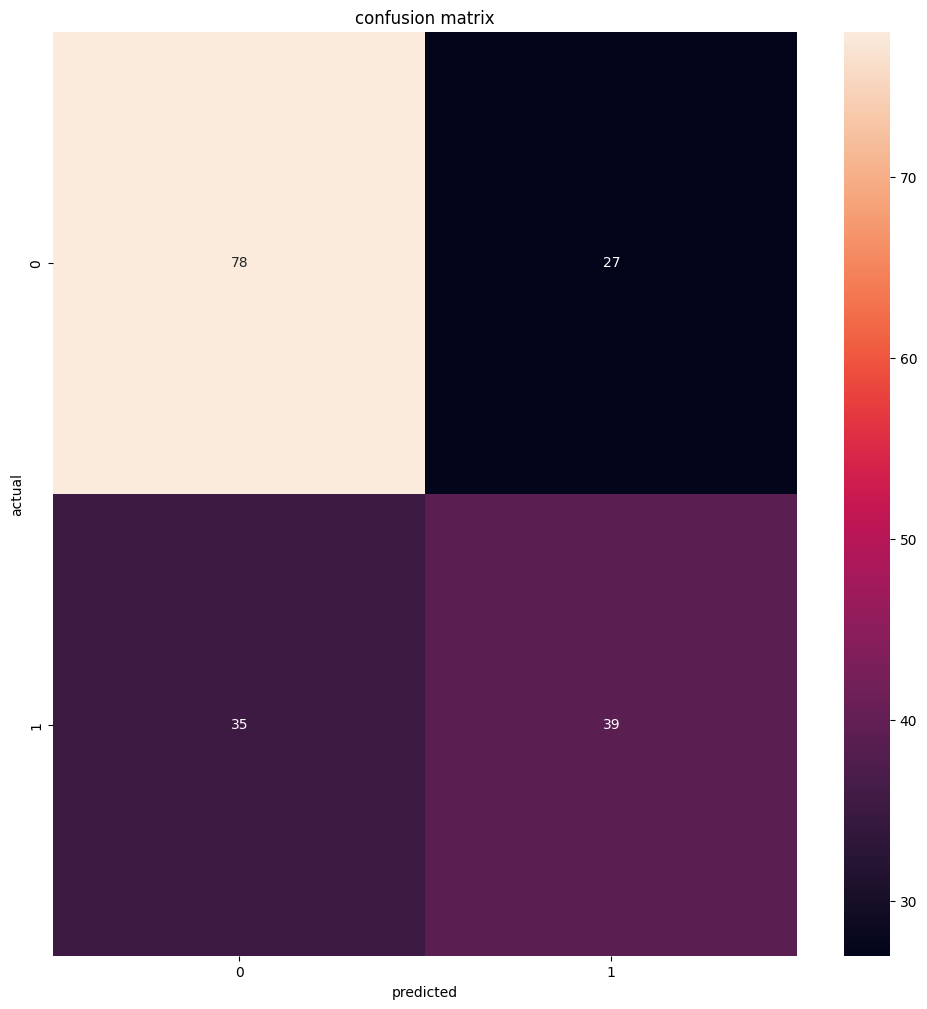

In [29]:
plt.figure(figsize = (12,12))
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()